In [52]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import sklearn.metrics

In [53]:
#Import data as DataFrame
data = pd.read_csv('AdultUCI.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [54]:
data = data.dropna()

In [55]:
#dropping the categorical variables minus the target variable
data_num = data.drop(columns=['workclass','education','marital-status','occupation','relationship',
                              'race','sex','native-country'])
data_num.head(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,2174,0,40,small
1,50,83311,13,0,0,13,small
2,38,215646,9,0,0,40,small
3,53,234721,7,0,0,40,small
4,28,338409,13,0,0,40,small
5,37,284582,14,0,0,40,small
6,49,160187,5,0,0,16,small
7,52,209642,9,0,0,45,large
8,31,45781,14,14084,0,50,large
9,42,159449,13,5178,0,40,large


In [56]:
#split data into x & y
x = data_num[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]
y = data_num[['income']]
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [57]:
#normalize numeric variables
x_norm = x.copy()
for i in range(x_norm.shape[1]):
  x_norm.iloc[:,i] = preprocessing.scale(x_norm.iloc[:,i])

x_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30162 non-null  float64
 1   fnlwgt          30162 non-null  float64
 2   education-num   30162 non-null  float64
 3   capital-gain    30162 non-null  float64
 4   capital-loss    30162 non-null  float64
 5   hours-per-week  30162 non-null  float64
dtypes: float64(6)
memory usage: 1.6 MB


In [58]:
x_norm = x_norm.rename(columns={'education-num': 'education_num'})

In [59]:
#converting 'income' to a binary variable
y['income'] = y['income'].apply(lambda x: 0 if x == 'small' else 1)
y.head(20)

<ipython-input-59-9677b6586d36>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].apply(lambda x: 0 if x == 'small' else 1)


,income
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


In [60]:
#k-means cluster analysis for 1-10 clusters
from scipy.spatial.distance import cdist
clusters = range(1,11)
meandist=[]

In [61]:
#perform k-means analysis & check average within cluster distances vs. different k-values
for k in clusters:
  model=KMeans(n_clusters=k)
  model.fit(x_norm)
  clusassign=model.predict(x_norm)
  meandist.append(sum(np.min(cdist(x_norm, model.cluster_centers_, 'euclidean'),
                             axis=1))/ x_norm.shape[0])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Selecting Optimal Clusters with the Elbow Method')

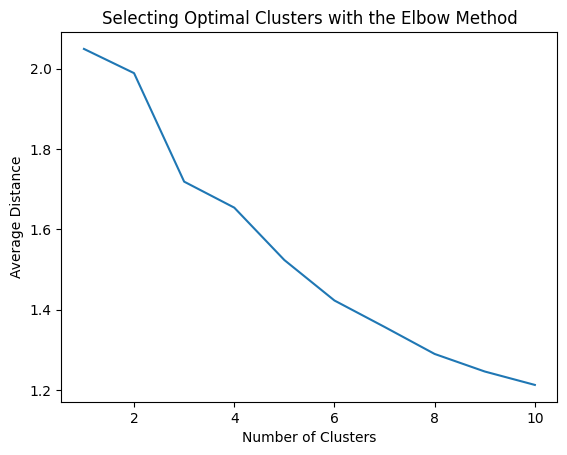

In [62]:
%matplotlib inline
plt.plot(clusters, meandist)
plt.xlabel('Number of Clusters')
plt.ylabel('Average Distance')
plt.title('Selecting Optimal Clusters with the Elbow Method')

In [63]:
#k-means clusters = 2
model = KMeans(n_clusters=2)
model.fit(x_norm)
predY = np.choose(model.labels_,[0,1]).astype(np.int64)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [64]:
model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

Text(0.5, 1.0, 'K Means Clustering Result')

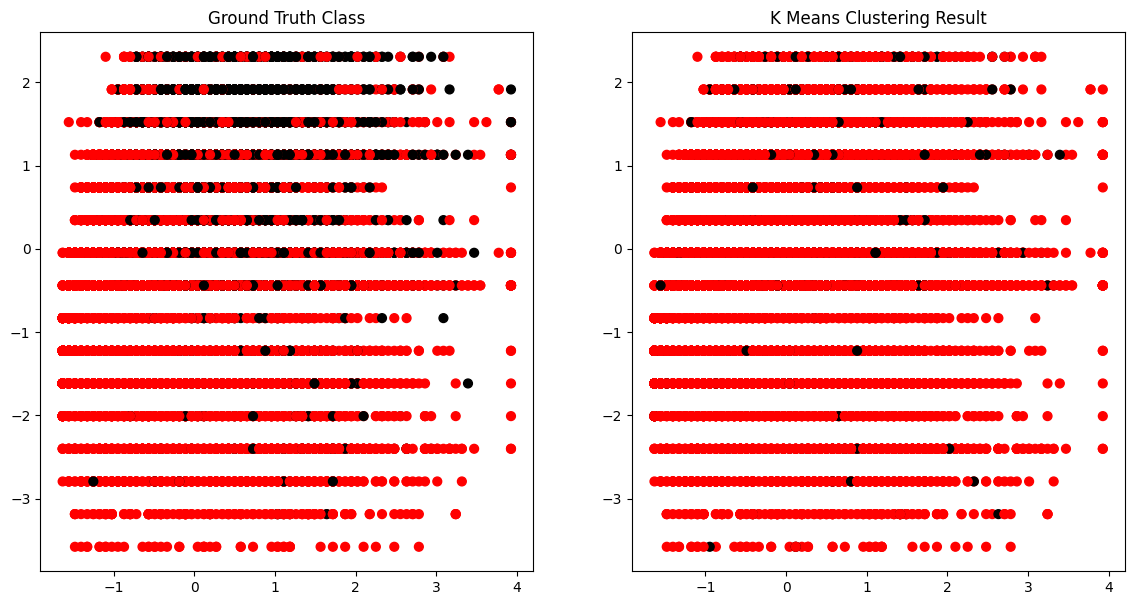

In [65]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x_norm.age, x_norm.education_num, c=colormap[y.income], s=40)
plt.title('Ground Truth Class')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x_norm.age, x_norm.education_num, c=colormap[model.labels_], s=40)
plt.title('K Means Clustering Result')

Text(0.5, 1.0, 'K Means Clustering Result')

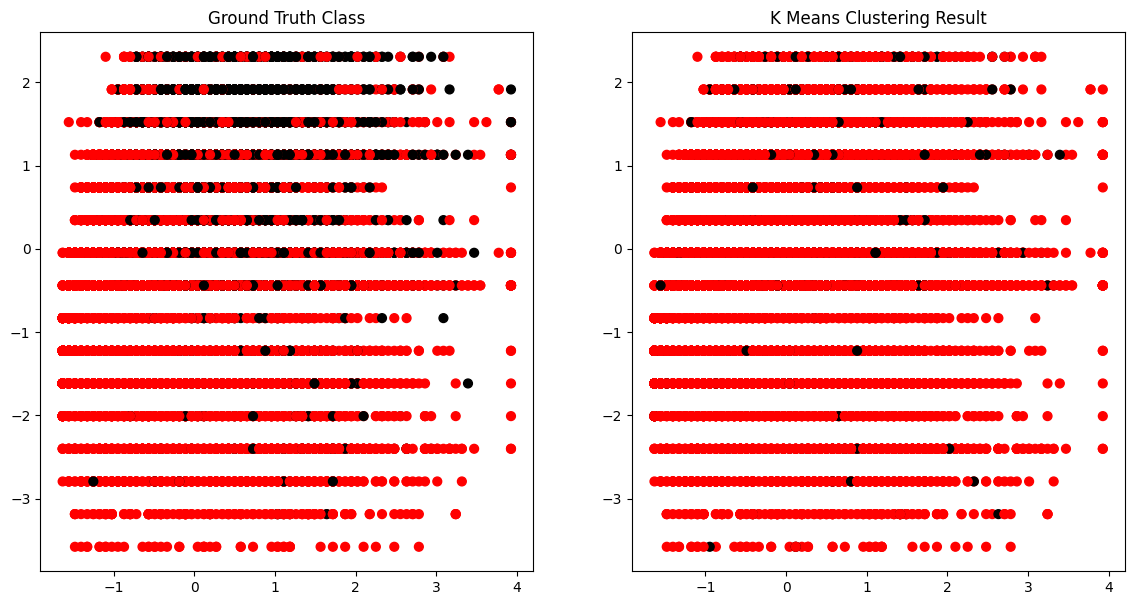

In [66]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red', 'black'])

# Plot the Original Classifications
plt.subplot(1, 2, 1)
plt.scatter(x_norm.age, x_norm.education_num, c=colormap[y.income], s=40)
plt.title('Ground Truth Class')

# Plot the Models Classifications
plt.subplot(1, 2, 2)
plt.scatter(x_norm.age, x_norm.education_num, c=colormap[model.labels_], s=40)
plt.title('K Means Clustering Result')

In [67]:
# Performance Measures
import sklearn.metrics
sklearn.metrics.confusion_matrix(y, predY)

array([[21995,   659],
       [ 6773,   735]])

In [68]:
#Accuracy
print("Accuracy: ",sklearn.metrics.accuracy_score(y, predY))

Accuracy:  0.7535972415622306
